# Regressão linear, lógica fuzzy e emissão de CO²
Neste notebook, usarei regressão linear junto à lógica fuzzy para prever a quantidade de gás carbonico que uma viagem de carro pode emitir.

In [18]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

## Treinando modelo de regressão linear

### Baixando os dados

Descomente o codigo abaixo, caso esteja no google colab

In [19]:
# !pip install wget
# !wget https://raw.githubusercontent.com/plorazxi/Inteligencia-computacional/refs/heads/main/Emissao%20de%20co2/emission-co2-perimetre-complet.csv

### Carregando dataset

In [20]:
df = pd.read_csv('emission-co2-perimetre-complet.csv')
df.head(5)

,Transporteur,Origine,Origine_uic,Destination,Destination_uic,Distance entre les gares,Train - Empreinte carbone (kgCO2e),Autocar longue distance - Empreinte carbone (kgCO2e),Avion - Empreinte carbone (kgCO2e),Voiture électrique (2.2 pers.) - Empreinte carbone (kgCO2e),Voiture thermique (2.2 pers.) - Empreinte carbone (kgCO2e)
0,TGV,Paris Est,87113001,Metz,87192039,352.0,1.0208,11.4540,NaN,15.604,35.7896
1,TGV,Aeroport CDG2 TGV Roissy,87271494,Lille Europe,87223263,203.0,0.5887,6.9345,NaN,9.447,21.6678
2,International,Paris Nord,88194060,Bruxelles N Aero,88194060,314.0,2.4178,10.7640,37.9745,14.664,33.6336
3,International,Paris Gare de Lyon,87686006,Geneve,85010082,503.0,1.7102,18.6645,59.0396,25.427,58.3198
4,TGV,Marne la Vallee Chessy,87111849,Avignon TGV,87318964,646.0,1.8734,24.1845,NaN,32.947,75.5678


### Processamento do dataset

In [21]:
df.columns

Index(['Transporteur', 'Origine', 'Origine_uic', 'Destination',
       'Destination_uic', 'Distance entre les gares',
       'Train - Empreinte carbone (kgCO2e)',
       'Autocar longue distance - Empreinte carbone (kgCO2e)',
       'Avion - Empreinte carbone (kgCO2e)',
       'Voiture électrique (2.2 pers.) - Empreinte carbone (kgCO2e)',
       'Voiture thermique (2.2 pers.) - Empreinte carbone (kgCO2e)'],
      dtype='object')

In [22]:
df = df.drop(df.columns[:5], axis=1)
df.columns

Index(['Distance entre les gares', 'Train - Empreinte carbone (kgCO2e)',
       'Autocar longue distance - Empreinte carbone (kgCO2e)',
       'Avion - Empreinte carbone (kgCO2e)',
       'Voiture électrique (2.2 pers.) - Empreinte carbone (kgCO2e)',
       'Voiture thermique (2.2 pers.) - Empreinte carbone (kgCO2e)'],
      dtype='object')

In [23]:
distancia = df[['Distance entre les gares']]
CO2 = df[['Voiture thermique (2.2 pers.) - Empreinte carbone (kgCO2e)']]
print(distancia.shape)
print(CO2.shape)


(119, 1)
(119, 1)


### Dividindo dataset de treino e teste

In [24]:
distancia_treino, distancia_test, CO2_treino, CO2_teste = train_test_split(distancia, CO2, test_size=0.2, random_state=42)
type(distancia_treino)

pandas.core.frame.DataFrame

### Exibindo dataset de treino 

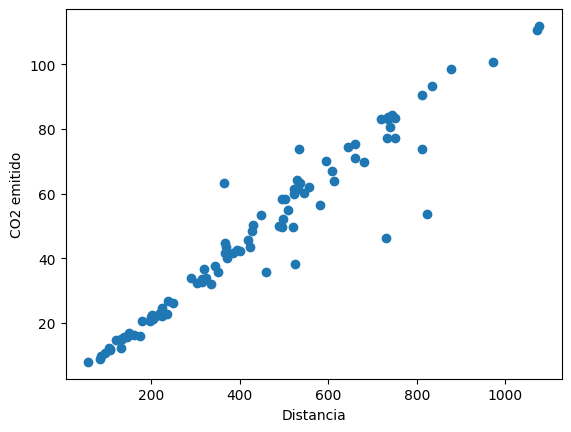

In [25]:
plt.scatter(distancia_treino, CO2_treino)
plt.xlabel("Distancia")
plt.ylabel("CO2 emitido")
plt.show()

### Treinando o modelo de regrassão linear

In [26]:
modelo_carro = linear_model.LinearRegression()

modelo_carro.fit(distancia_treino, CO2_treino)

LinearRegression()

### Exibindo a reta de regressão no dataset de treino

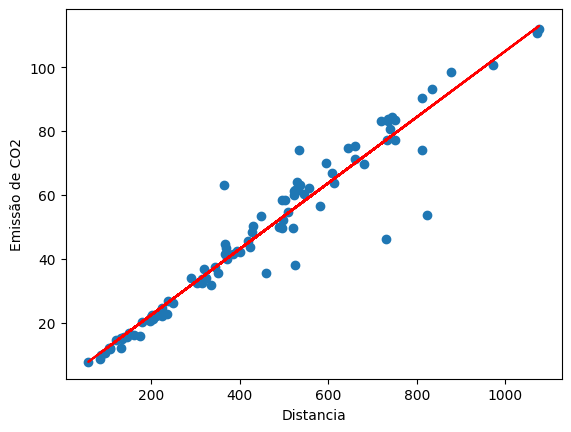

In [27]:
plt.scatter(distancia_treino, CO2_treino)
plt.plot(distancia_treino, modelo_carro.coef_[0][0]*distancia_treino + modelo_carro.intercept_[0], '-r')
plt.xlabel("Distancia")
plt.ylabel("Emissão de CO2")
plt.show()

### Realizando os testes

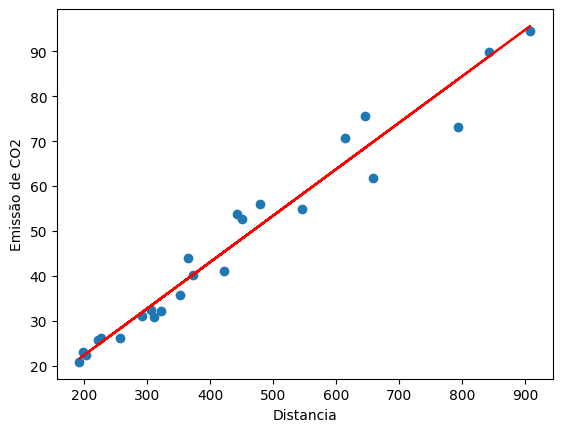

In [28]:
plt.scatter(distancia_test, CO2_teste)
plt.plot(distancia_test, modelo_carro.coef_[0][0]*distancia_test + modelo_carro.intercept_[0], '-r')
plt.xlabel("Distancia")
plt.ylabel("Emissão de CO2")
plt.show()

In [29]:
predicoesCo2 = modelo_carro.predict(distancia_test)

print(CO2_teste.mean())
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(CO2_teste, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , CO2_teste) )

Voiture thermique (2.2 pers.) - Empreinte carbone (kgCO2e)    46.484258
dtype: float64
Raiz do Erro Quadrático Médio (RMSE): 4.18 
R2-score: 0.96


## Usando o modelo para fazer predições

### Digite dentro do codigo a seguir, onde está indicado, a distância, em Km, percorrida

In [30]:
valor = int(input("Qual a distância percorrida em Km? "))
entrada = pd.DataFrame([[valor]], columns=['Distance entre les gares'])
previsao = modelo_carro.predict(entrada)
print(f"A previção de emissão de gás carbonico foi: {previsao} KgCO2e")

A previção de emissão de gás carbonico foi: [[6.2038908]] KgCO2e
